**Ejercicio 2**

Se realiza un censo de la poblacion de Estados Unidos cada 10 años. La siguiente tabla muestra la población, en miles de personas, desde 1960, hasta 2010.

| Año              | 1960   | 1970   | 1980   | 1990   | 2000   | 2010   |
|------------------|--------|--------|--------|--------|--------|--------|
| Poblacion(miles) | 179323 | 203302 | 226542 | 249633 | 281422 | 308746 |

1. Use el ajuste polinomial simple determinar la aproximacion de la poblacion en los años 1950, 1975, 2014 y 2010.
2. La poblacion en 1950 era aproximadamente 150 697 360 y en 2014 se calculó que era de 317 298 000. ¿Qué tan precisas cree usted que son sus cifras para 1975 y 2020?
3. Realice la gráfica de los datos observados, el polinomio construido y los puntos solicitados.

In [50]:
from SistemasEcuacionesLineales.EliminacionGaussiana.EliminacionGaussiana import eliminacion_gaussiana

import matplotlib.pyplot as plt
import numpy as np

x_data = np.array([1960, 1970, 1980, 1990, 2000, 2010])
y_data = np.array([179323, 203302, 226542, 249633, 281422, 308746])

def matriz_polinomial(x_data):

    n = len(x_data)

    # declarar una matriz de ceros para llenar dependiente de los valores de x_data
    M = np.zeros([n,n], float)
    M[0:n,0] = 1
    for i in range(n):
        for j in range(1, n):
            M[i,j] = M[i, j-1]*x_data[i]
    return M

coef = eliminacion_gaussiana(matriz_polinomial(x_data), y_data)
print(coef)


[ 7.72691708e+13 -1.94873197e+11  1.96584034e+08 -9.91527225e+04
  2.50046792e+01 -2.52225000e-03]


In [51]:
# construimos el polinomio

poli = lambda x: sum(coef[i]*x**i for i in range(len(coef)))

# años a evaluar
años_eval = [1950, 1975, 2010, 2014]
aprox = {año: poli(año) for año in años_eval}

for año, val in aprox.items():
    print(f"{año}: {val}")


1950: 192538.9375
1975: 215525.78125
2010: 308745.953125
2014: 306214.84375


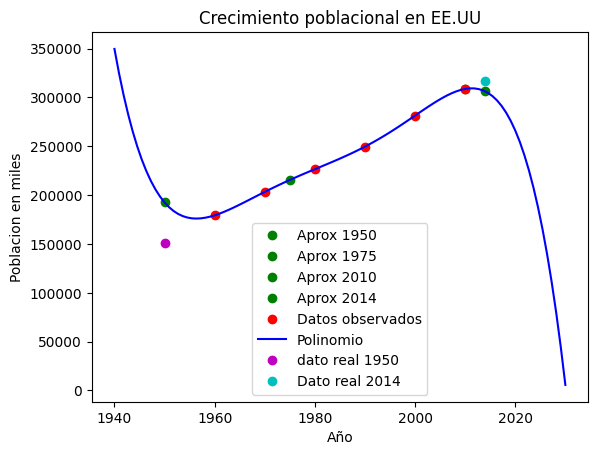

In [52]:
# Graficamos
ux = np.linspace(min(x_data)-20, max(x_data)+20, 100)

for año in años_eval:
    plt.plot(año, poli(año), 'go', label=f"Aprox {año}")

plt.plot(x_data, y_data, 'ro', label='Datos observados')
plt.plot(ux, poli(ux), 'b', label='Polinomio')

plt.plot(1950, 150697360/1000, 'mo', label='dato real 1950')
plt.plot(2014, 317298000/1000, 'co', label='Dato real 2014')

plt.xlabel('Año')
plt.ylabel('Poblacion en miles')
plt.title('Crecimiento poblacional en EE.UU')

plt.legend()
plt.show()